# Objectif

Ce projet vise à élaborer des modèles de classification supervisée pour anticiper la survie d'un passager du Titanic en fonction de ses caractéristiques. La base de données sera partitionnée en ensembles d'apprentissage et de test afin de former et évaluer les performances des modèles.

Pour atteindre cet objectif, nous utiliserons 3 méthodes de classification supervisée: la régression logistique l'arbre de décision et La forêt aléatoire.



# Description des donnees disponibles et visualisation



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
# Ignorer tous les warnings
warnings.filterwarnings("ignore")


## Nettoyage des donnees

Avant l'exploitation de notre base de données, il est necessaire de rendre celle ci vraisemblablement propre du point de vu statistique. Le présent paragraphe a donc pour objectif de s'assurer de cela.



In [2]:
#Importation de la base de données
df=pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


les variables de notre de base de données sont :

    • Passengerld: l'identifiant du passager
    • Survived: la variable à predire ("Survivant"=1;"Nonsurvivant"=0)
    • Pclass: la classe du billet
    • Name: le nom du passager
    • Sex : le sexe du passager
    • Age :l'age du passager
    • SibSp :le nombre de freres/soeurs/conjoints à bord
    • Parch : le nombre de parents/enfants à bord
    • Ticket :le numero du billet
    • Fare :le tarif passager
    • Cabin :le numero de la cabine
    • Embarked :le port d'embarcation(C=Cherbourg, Q=Queenstown, S=Southampton)

In [3]:
#structures de la base de données 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

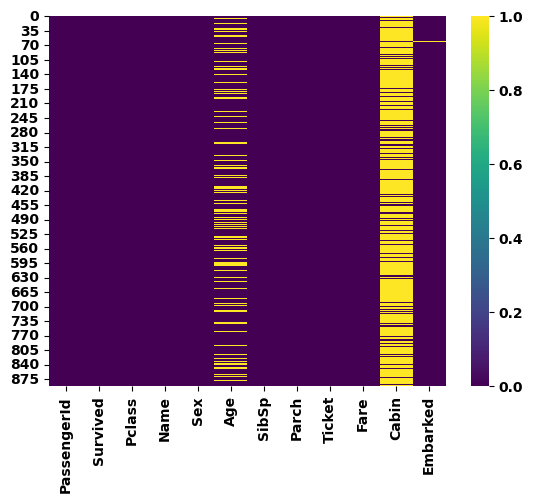

In [4]:
#visualiser les données manquantes dans notre base de données 
sns.heatmap(df.isnull(),cmap='viridis')

On remarque que parmis les variables de notre base l'age,le numero de la cabine et le port d'ambarcation possedent des valeurs manquantes   

Le numero de la cabine possede le plus grand taux de valeur manquante suivie de la variable age et enfin le port d'embarcation Pour le traitement des
données manquantes, nous allons preconiser les methodes suivantes :
- Pour l'age: on va se dire que selon la classe d'appartenance du billet, les passagers ont relativement des ages tres proches. Nous allons donc
remplacer les ages manquants pas la moyenne des age de de la classe d'appartenance du passager 
-  Pour cabine le numero de la cabine possede un fort taux de variable manquante un peu plus de 77% il es donc judicieux de supprimer cette variable de notre analyse pour la suite
- Pour ce qui est du port d'ambarcation, nous avons 2 données manquantes que nous allons supprimer car le taux de non reponse de cette variable est inferieure à 5% donc cela ne risque pas de modifier la structure de nos donnnées

<Axes: xlabel='Pclass', ylabel='Age'>

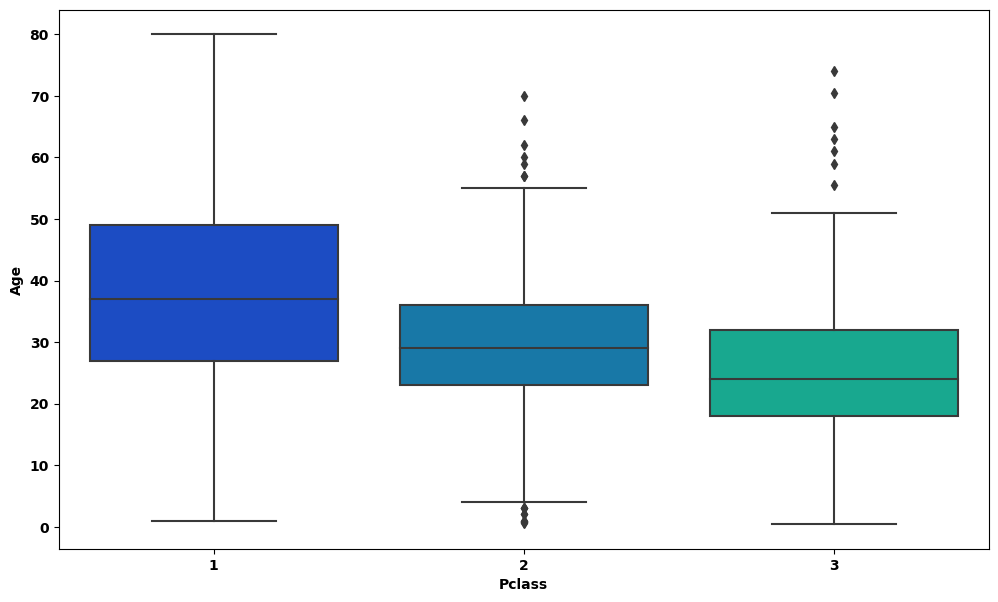

In [5]:
# age moyen par classe 
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

On remarque que plus les passagers sont dans une classe importante, plus ceux ci sont agé, il existe donc un lien entre la classe du passager et son age .
Nous allons donc emputer par la moyenne de la classe dans laquelle le passager se trouve 


In [6]:
df.groupby(["Pclass"]).Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [7]:
#definition de la fonction d'amputation de l'age manquant par la moyenne de la classe dans laquelle il se trouve 
def impute_age (cols):
 Age=cols[0]
 Pclass=cols[1]
 if pd.isnull(Age):
     if Pclass==1:
         return 38
     elif Pclass==2:
         return 30
     else:
         return 25
 else:
     return Age


<Axes: >

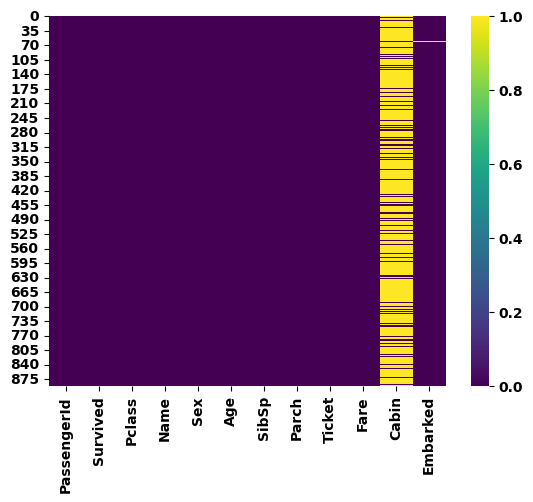

In [8]:
#Application de la fonction à notre base de données
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)
#Verifions le traitement des valeurs manquantes de l'age
sns.heatmap(df.isnull(),cmap='viridis')


In [9]:
# Nous supprimons la variable cabin car son taux de valeur manquant est tres élévé et une imputation pourait
# avoir de graves consequences sur la structure de notre base de données.
df.drop('Cabin',axis=1,inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


<Axes: >

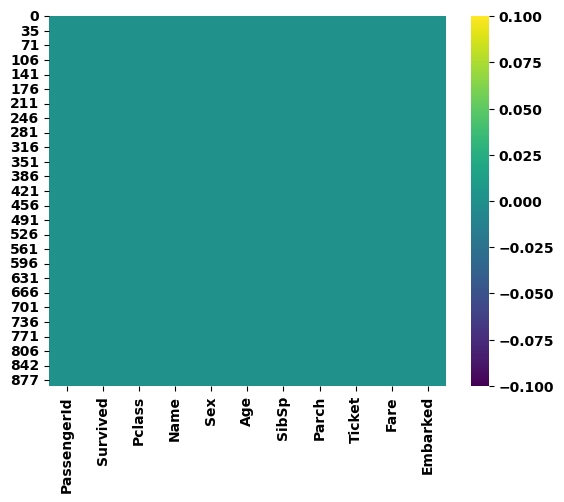

In [12]:
sns.heatmap(df.isnull(),cmap='viridis')


Notre base est maintenant propre et nous pouvons faires nos differents analyses. Par ailleurs, il est judicieux de transformer les variables de type objet :
notement le le sexe et le port d'ambarcation car le nom et le numero de tiket ne sont pas tres important pour notre analyse. Par ailleurs nous allons supprimer
les variables Name et Ticket qui n'apportent pas d'informations statistiques à notre étude.


In [13]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


## Repartion des données suivant les differentes variables

Il est question ici d'analyser la repartition des individus selon les differentes caracteristiques. Pour cela nous allons créér un dataframe appélé cat_vars qui
contiendra toute les variables catégorielle de notre etude, et grace à celà, nous allons tracé le diagramme circulaire de chacune de ces variables.


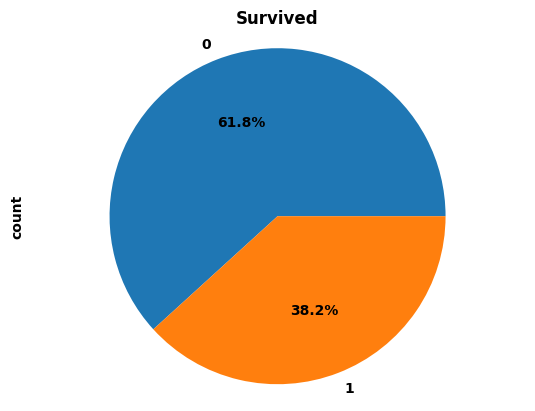

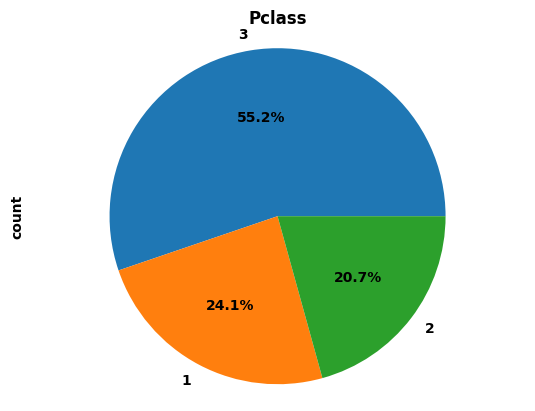

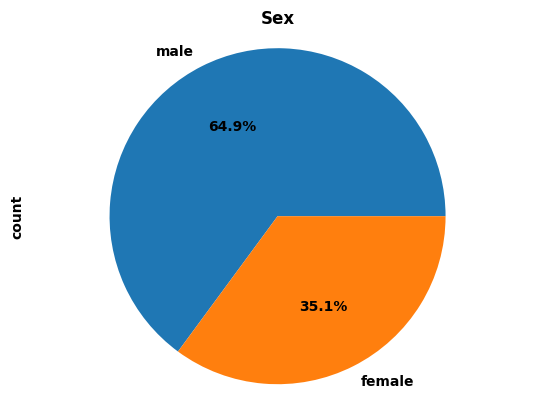

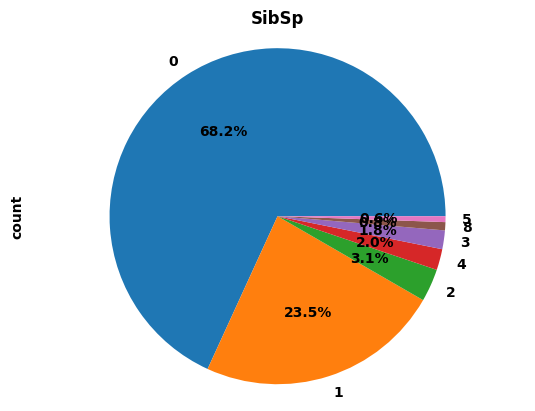

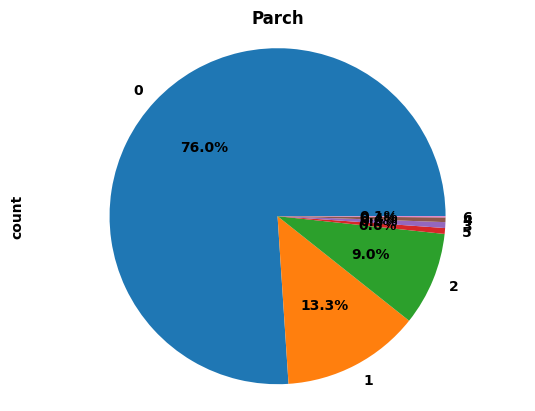

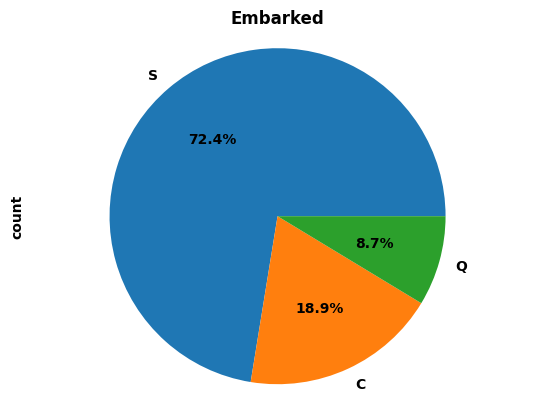

In [15]:
#Selection des variables categorielles
cat_vars=['Survived','Pclass','Sex','SibSp','Parch','Embarked']
#Générons les pie plot pour chaque variable catégorielles
for var in cat_vars:
 df[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
 plt.title(var)
 plt.axis('equal')
 plt.show()

- Dans notre base de données, seulement 38,2% de naufragés ont survecu. Nous somme dosn dans un cas our la base de données n'est pas équilibré selon notre variable de reponse;
- selon la classe des passages, nous remarquons que plus de la moitié de ceux ci sont en 3eme classe et pres du quart soit 24.1% sont en première classe;
- Concernant le sexe des passagers, il faut noter que ceux ci sont majoritairement des hommes (soit 64,9%);
- concernant la relation freres, soeurs ou conjoint nous remarquons que un peu plus de 68% de voyageur ce sont deplacés seule et 23,5% d'entre eux ce sont deplacés en compagnie soit d'un frere, ou d'une soeur ou encore d'un conjoint;
- En examinant la relation parent et enfant, on remarque que la plupart des voyageurs ce sont deplacés sans parent ou enfant (soit 76% de voyageurs);
tant dis que 13,3% d'entre eux etaient accompagnes d'un proche qui etait soit un parent ou un enfant
- pour ce qui est du port d'embarcation, un peu pres de 75% de nos voyageurs provenaient de l'embarcation de Cherbourg (C); il faut noter que peux de
voyageurs soit 8,7% ont embarqué à Queenstown (Q)

In [16]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [17]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,0
888,889,0,3,1,25.0,1,2,23.4500,0
889,890,1,1,0,26.0,0,0,30.0000,1


## Analyse descriptive bivariée


Nous allons ici,faire un croisement entre notre variable d'interet et les differentes variables afin d'établir un premier soupcon de lien entre la variable d'interet
et les caracteristiques des voyageurs

### graphiques croisés des variables qualitatives


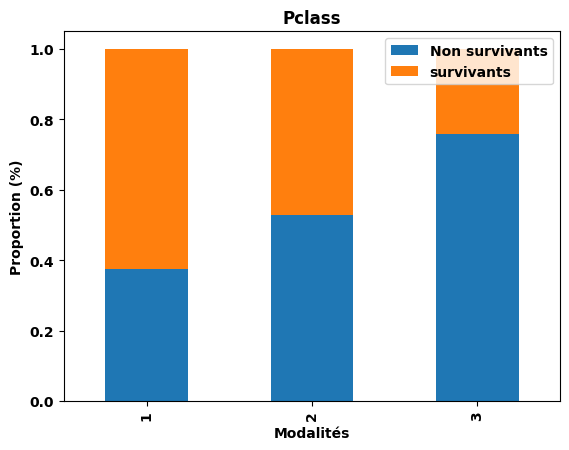

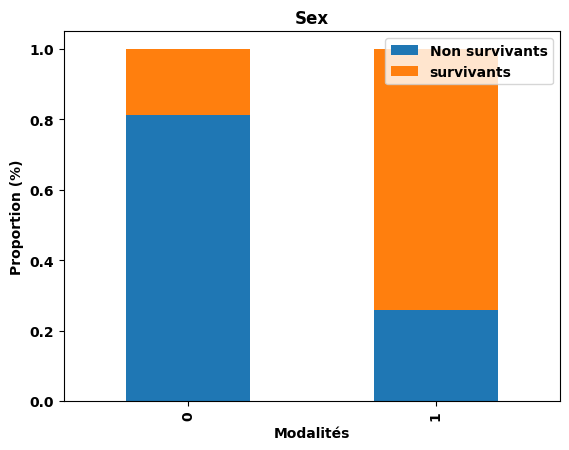

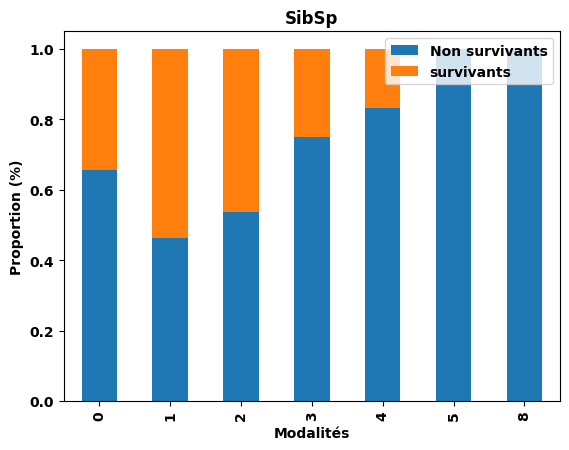

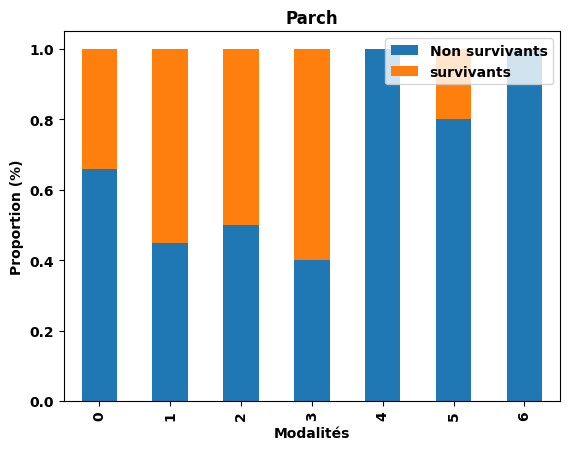

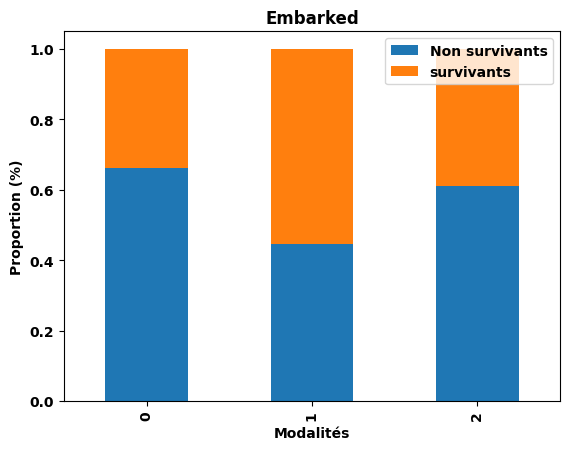

In [18]:
#Selection des variables categorielles
cat_vars=['Pclass','Sex','SibSp','Parch','Embarked']
for var in cat_vars:
 figsize=(20,20)
 (df.groupby([var,'Survived'])['Survived'].count()/df.groupby([var])[var].count()).unstack(level=1).plot(kind='bar', stacked=True)
 plt.title(var)
 plt.xlabel('Modalités')
 plt.ylabel('Proportion (%)')
 plt.legend(['Non survivants', 'survivants'])
 plt.show()

### Graphique croisé des variables quantitatives

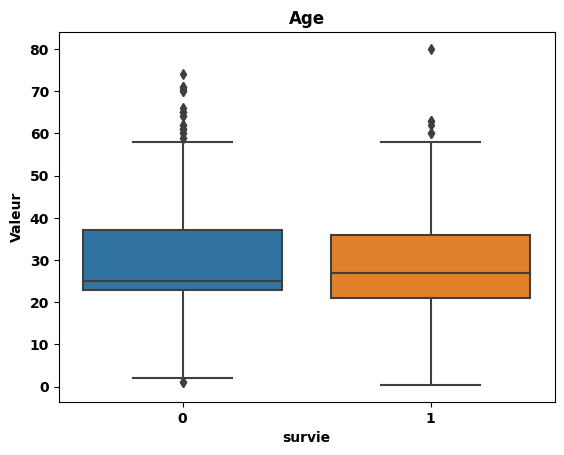

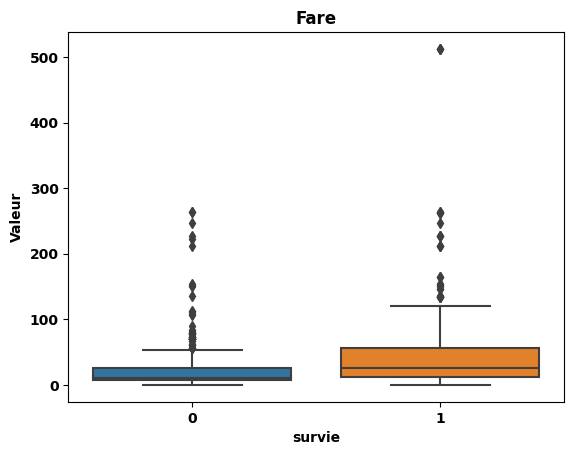

In [19]:
# Sélectionner les variables numériques
num_vars=['Age','Fare']
# Générer un box plot pour chaque variable numérique
for var in num_vars:
 sns.boxplot(x='Survived', y=var, data=df)
 plt.title(var)
 plt.xlabel('survie')
 plt.ylabel('Valeur')
 plt.show()

# Mise en place des methodes de classification supervisées

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the models to be tested
models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier()}

results = []

# Iterate over each model
for model_name, model in models.items():
    # Apply feature selection with RFECV
    selector = RFECV(model, step=1, min_features_to_select=5, cv=10)
    selector.fit(X_train, y_train)
    X_train_selected = selector.transform(X_train)
        
    # Fit the model on the selected features
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train_selected, y_train)
        
    # Evaluate the model on the test set
    X_test_selected = selector.transform(X_test)
    y_pred = pipeline.predict(X_test_selected)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, pipeline.predict_proba(X_test_selected)[:, 1])
        
    # Get selected feature indices and names
    selected_feature_indices = selector.get_support(indices=True)
    selected_features = [X_train.columns[i] for i in selected_feature_indices]
        
    # Append the results to the list
    results.append({'Model': model_name,
                    'Accuracy': acc,
                    'F1 Score': f1,
                    'Precision': precision,
                    'Recall': recall,
                    'AUC': auc,
                    'Selected Features': selected_features})

# Convert the results to a dataframe
results_df = pd.DataFrame(results)

In [22]:
results_df

,Model,Accuracy,F1 Score,Precision,Recall,AUC,Selected Features
0,Logistic Regression,0.803371,0.758621,0.723684,0.797101,0.851416,"[Pclass, Sex, Age, SibSp, Parch, Embarked]"
1,Decision Tree,0.769663,0.717241,0.684211,0.753623,0.754487,"[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]"
2,Random Forest,0.808989,0.763889,0.733333,0.797101,0.865510,"[Pclass, Sex, Age, SibSp, Fare]"


-  La régression logistique a affiché la meilleure performance globale, avec une accuracy de 80.34%, ce qui signifie qu'elle prédit correctement la survie ou le décès des passagers dans environ 80% des cas. Le F1 Score de 75.86% indique un bon équilibre entre la précision et le rappel. <br>

- L'arbre de décision a une accuracy légèrement inférieure à celle de la régression logistique avec une accuracy de.77,52% , mais il a également une performance équilibrée en termes de F1 Score 72,60 %.  <br>
- La forêt aléatoire démontre une bonne accuracy (82%) avec un bon équilibre entre la précision et le rappel (F1 Score de 77,46%), en mettant en évidence l'importance des caractéristiques telles que la classe des passagers, leur sexe, leur âge, et d'autres informations relatives à la famille et au tarif.%es..


Cependant, je ne m'arrêterai pas là dans ma recherche de la performance optimale. Je vais maintenant me concentrer sur l'optimisation des hyperparamètres pour affiner encore ces modèles. Je vais explorer différentes combinaisons d'hyperparamètres en utilisant des techniques telles que la validation croisée et la recherche aléatoire pour trouver le meilleur ensemble d'hyperparamètres..

## Optimisation des hyperparamètres

### Meilleurs hyperparamètres pour chaque modele

In [34]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à optimiser pour chaque modèle
random_forest_params = {
    'randomforestclassifier__n_estimators': [10, 50, 100],
    'randomforestclassifier__max_depth':  [10, 20, 30, None],
    'randomforestclassifier__min_samples_split': [2,3,4,5,6,7],
    'randomforestclassifier__min_samples_leaf': [1,2,3,4,5,6]
}

logistic_regression_params = {
    'logisticregression__C': np.logspace(-4, 4, 50),
    'logisticregression__penalty': ['l1', 'l2']
}

decision_tree_params = {
    'decisiontreeclassifier__max_depth': [3,5],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_leaf_nodes': [7]
}
    
# Créer les modèles
random_forest_model = RandomForestClassifier()
logistic_regression_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()

# Créer les pipelines avec mise à l'échelle des données
random_forest_pipeline = make_pipeline(StandardScaler(), random_forest_model)
logistic_regression_pipeline = make_pipeline(StandardScaler(), logistic_regression_model)
decision_tree_pipeline = make_pipeline(StandardScaler(), decision_tree_model)

# Effectuer la recherche par grille des hyperparamètres pour chaque modèle
random_forest_grid_search = GridSearchCV(random_forest_pipeline, random_forest_params, cv=5, verbose=2, n_jobs=-1)
logistic_regression_grid_search = GridSearchCV(logistic_regression_pipeline, logistic_regression_params, cv=5, verbose=2, n_jobs=-1)
decision_tree_grid_search = GridSearchCV(decision_tree_pipeline, decision_tree_params, cv=5, verbose=2, n_jobs=-1)

# Adapter les données aux modèles
random_forest_grid_search.fit(X_train, y_train)
logistic_regression_grid_search.fit(X_train, y_train)
decision_tree_grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres pour chaque modèle
print("Meilleurs hyperparamètres pour Random Forest:", random_forest_grid_search.best_params_)
print("Meilleurs hyperparamètres pour Régression Logistique:", logistic_regression_grid_search.best_params_)
print("Meilleurs hyperparamètres pour Arbre de Décision:", decision_tree_grid_search.best_params_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs hyperparamètres pour Random Forest: {'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__n_estimators': 10}
Meilleurs hyperparamètres pour Régression Logistique: {'logisticregression__C': 0.009102981779915217, 'logisticregression__penalty': 'l2'}
Meilleurs hyperparamètres pour Arbre de Décision: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__max_leaf_nodes': 7, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}


### les meilleurs modèles avec les meilleurs hyperparamètres trouvés

In [35]:
# Définir les meilleurs modèles avec les meilleurs hyperparamètres trouvés
best_random_forest_model = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=10)
best_logistic_regression_model = LogisticRegression(C=0.009102981779915217, penalty='l2')
best_decision_tree_model = DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=7, min_samples_leaf=1, min_samples_split=2)

# Entraîner les modèles sur l'ensemble de données d'entraînement
best_random_forest_model.fit(X_train, y_train)
best_logistic_regression_model.fit(X_train, y_train)
best_decision_tree_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
rf_predictions = best_random_forest_model.predict(X_test)
lr_predictions = best_logistic_regression_model.predict(X_test)
dt_predictions = best_decision_tree_model.predict(X_test)

# Calculer les métriques d'évaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_auc = roc_auc_score(y_test, best_random_forest_model.predict_proba(X_test)[:, 1])

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_f1_score = f1_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_auc = roc_auc_score(y_test, best_logistic_regression_model.predict_proba(X_test)[:, 1])

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_auc = roc_auc_score(y_test, best_decision_tree_model.predict_proba(X_test)[:, 1])

# Créer un DataFrame avec les résultats
best_results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy': [rf_accuracy, lr_accuracy, dt_accuracy],
    'F1 Score': [rf_f1_score, lr_f1_score, dt_f1_score],
    'Precision': [rf_precision, lr_precision, dt_precision],
    'Recall': [rf_recall, lr_recall, dt_recall],
    'AUC': [rf_auc, lr_auc, dt_auc]
})


In [36]:
best_results_df

,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Random Forest,0.814607,0.751880,0.781250,0.724638,0.835993
1,Logistic Regression,0.764045,0.603774,0.864865,0.463768,0.823627
2,Decision Tree,0.820225,0.771429,0.760563,0.782609,0.865776


 Le rappel d'environ 46% est considérablement inférieur à celui du modèle de forêt aléatoire. Cela signifie que le modèle a du mal à capturer un grand nombre de vrais positifs, c'est-à-dire les passagers qui ont réellement survécu.

In [37]:
#resultats avant grid search 
results_df

,Model,Accuracy,F1 Score,Precision,Recall,AUC,Selected Features
0,Logistic Regression,0.803371,0.758621,0.723684,0.797101,0.851416,"[Pclass, Sex, Age, SibSp, Parch, Embarked]"
1,Decision Tree,0.769663,0.717241,0.684211,0.753623,0.754487,"[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]"
2,Random Forest,0.808989,0.763889,0.733333,0.797101,0.865510,"[Pclass, Sex, Age, SibSp, Fare]"


# Arbre de Decision 

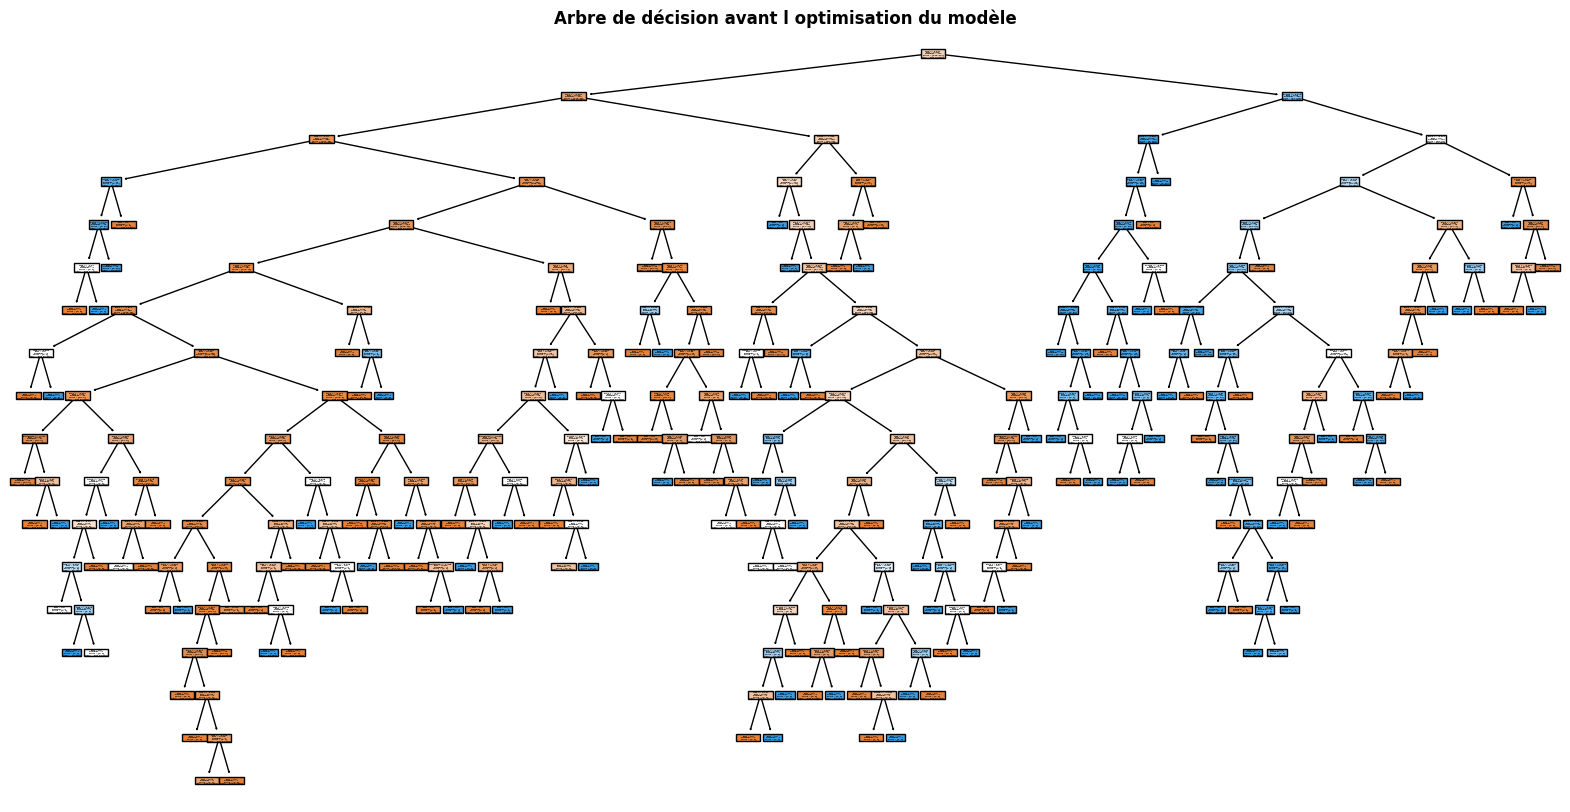

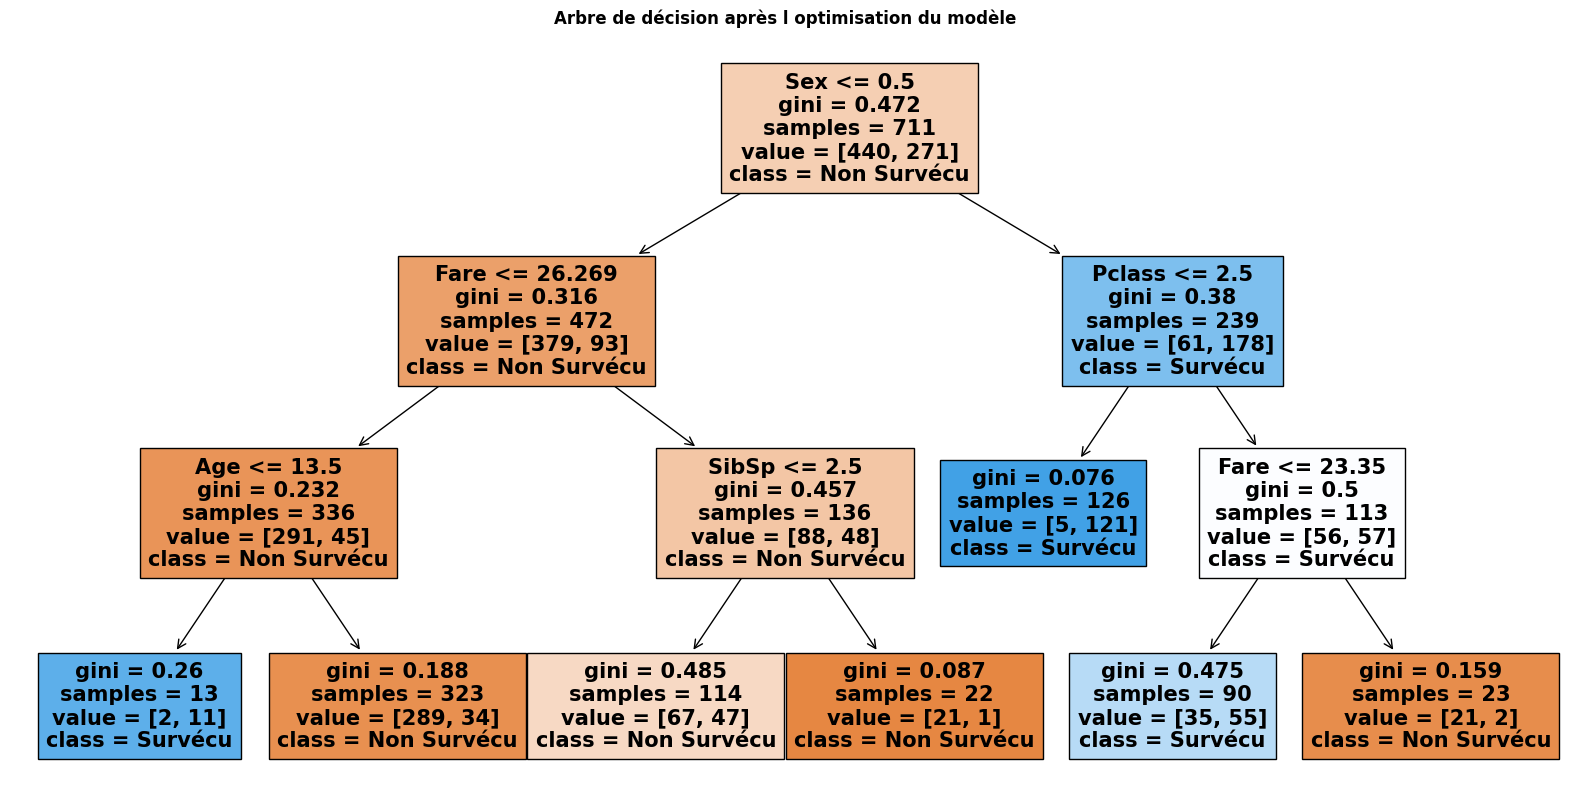

In [38]:
from sklearn.tree import plot_tree

# Appliquer la sélection des caractéristiques avec RFECV
selector = RFECV(decision_tree_model, step=1, min_features_to_select=5, cv=10)
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)

# Adapter le modèle aux caractéristiques sélectionnées
pipeline = make_pipeline(StandardScaler(), decision_tree_model)
pipeline.fit(X_train_selected, y_train)

# Obtenir les indices et les noms des caractéristiques sélectionnées
selected_feature_indices = selector.get_support(indices=True)
selected_features = [X_train.columns[i] for i in selected_feature_indices]

# Tracer l'arbre de décision avant l'optimisation du modèle
plt.figure(figsize=(20,10))
plot_tree(pipeline.named_steps['decisiontreeclassifier'], feature_names=selected_features, class_names=['Non Survécu', 'Survécu'], filled=True)
plt.title('Arbre de décision avant l optimisation du modèle')
plt.show()

# Tracer l'arbre de décision après l'optimisation du modèle
plt.figure(figsize=(20,10))
plot_tree(best_decision_tree_model, filled=True, feature_names=X.columns, class_names=['Non Survécu', 'Survécu'])
plt.title('Arbre de décision après l optimisation du modèle')
plt.show()


# Courbes ROC 

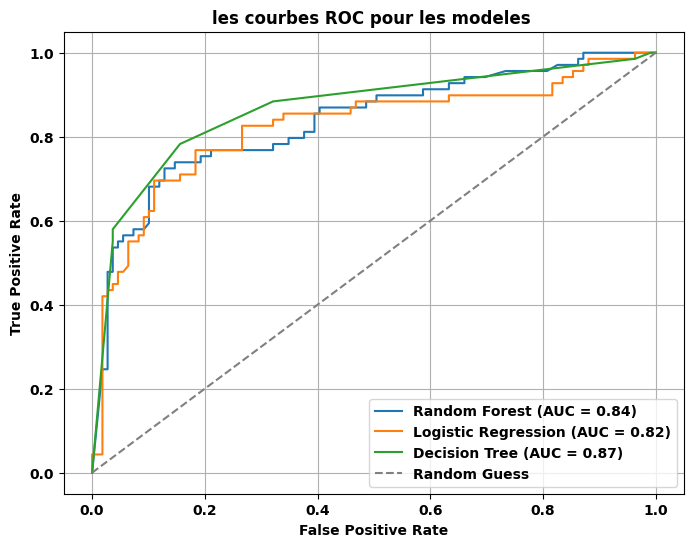

In [39]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculer les courbes ROC pour chaque modèle
rf_fpr, rf_tpr, _ = roc_curve(y_test, best_random_forest_model.predict_proba(X_test)[:, 1])
lr_fpr, lr_tpr, _ = roc_curve(y_test, best_logistic_regression_model.predict_proba(X_test)[:, 1])
dt_fpr, dt_tpr, _ = roc_curve(y_test, best_decision_tree_model.predict_proba(X_test)[:, 1])

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree (AUC = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('les courbes ROC pour les modeles ')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion sur les methodes et les resultats obtenus

À l'amorce de cette étude visant à élaborer 3 modèles de classification supervisée 
pour prédire la survie des passagers du Titanic, nous avons mis en
avant la régression logistique ,la foret alatoire et l'arbre de décision. 
Les résultats
obtenus révèlent que l'arbre de décision affiche une performance supérieure, avec une accuracy de 82,02%, comparé à la foret aleatoire apres qui atteint une accuracy de 81,46% et finalement la regression logistique avec une accuracy de 76,40 %



## Projet Réalisé par : Ikbel Ghrab